## Project Name : Predict Subscription of Bank term deposits for Clients

### Project Description: 
        We are provided with the client data such as : age of the client, their job type, their marital status,etc. 
        Along with the client data, you are also provided with the information of the call such as the duration of
        the call, day and month of the call, etc. Given this information, Our task is to predict if the client will
        subscribe to term deposit.

In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Exploratory Data Analysis of the Training Dataset

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
### The given Dataset has no null values at all.

In [8]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

##### there are total 19 variables,among them 10 are categorical variable including the'target_variable'("Subscribed")and 9 variables are continious in nature.

### Data Visualization Using Libraries

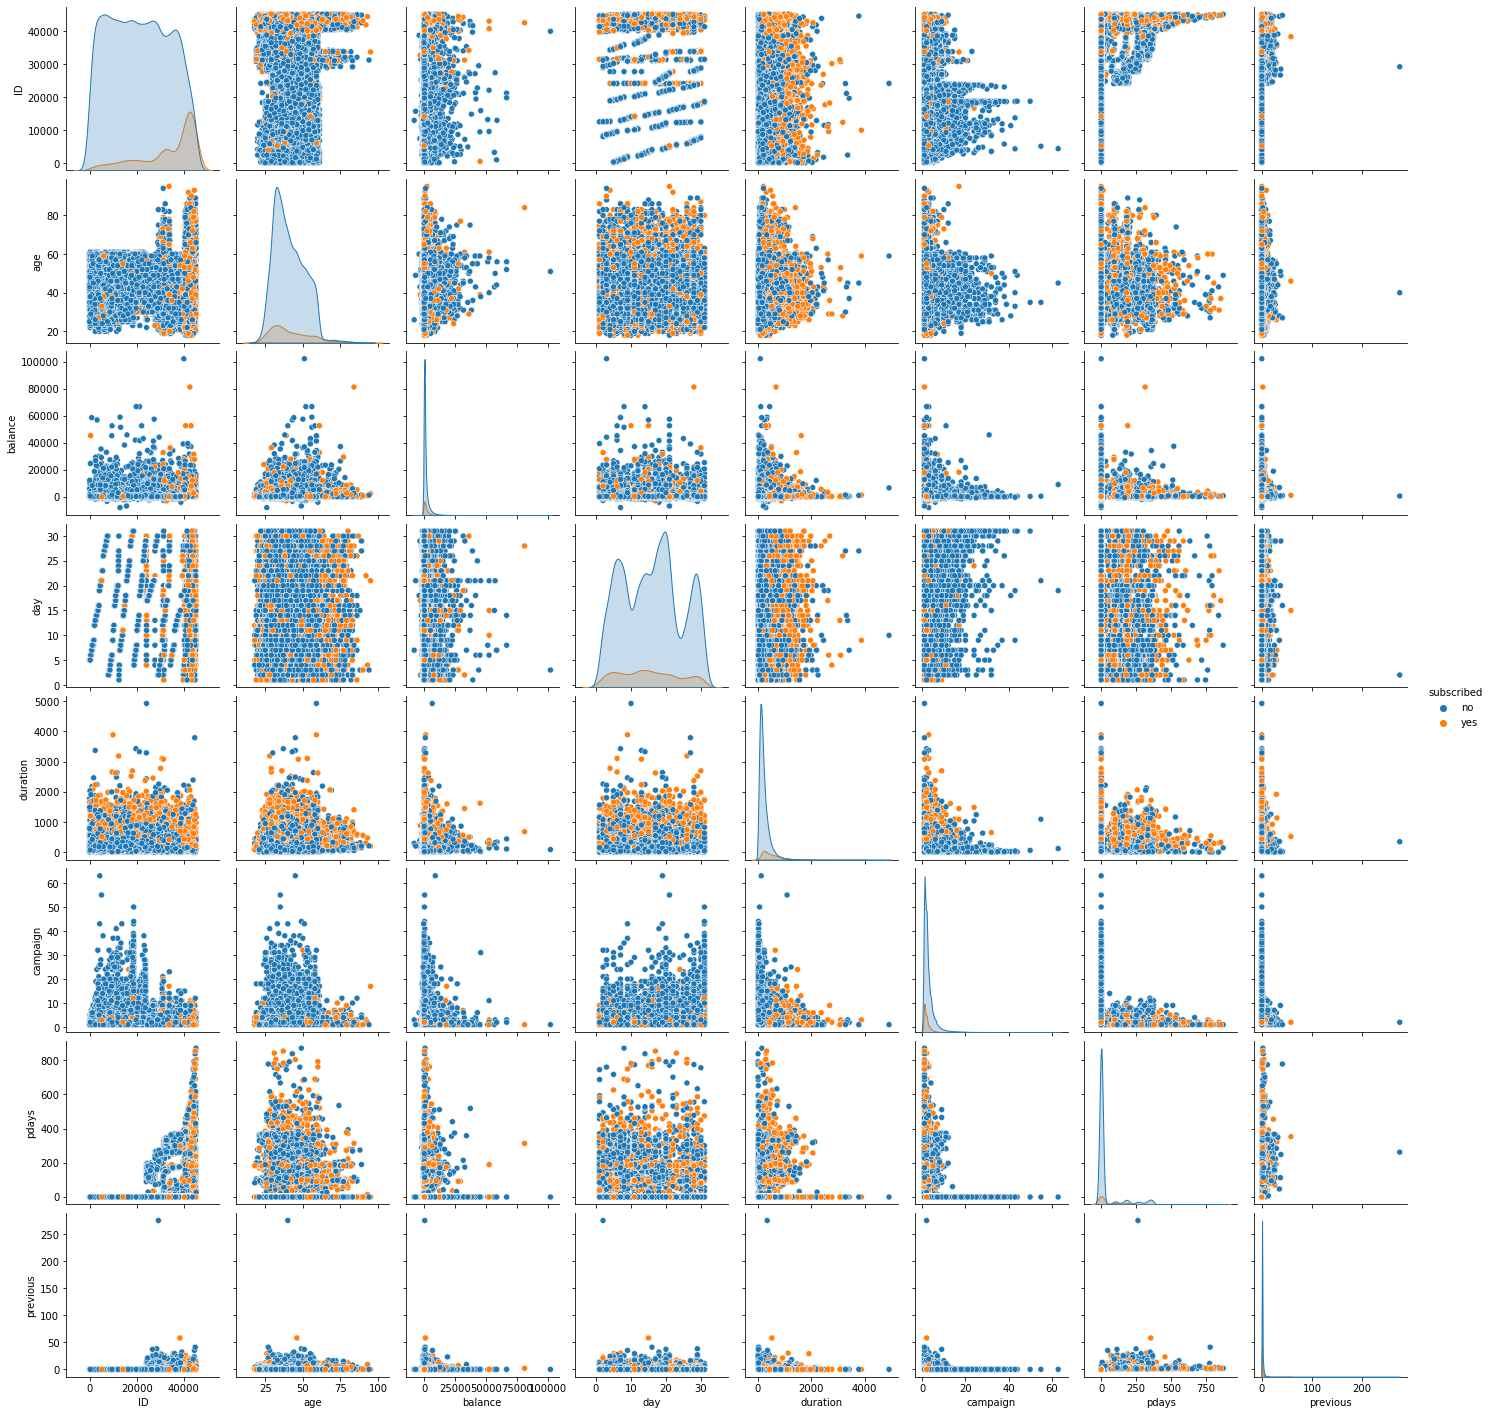

In [9]:
#Visualizing all the features with respect to the Target Variable
sns.pairplot(train,hue="subscribed")
plt.show()

all the variables are dependent and overlapped with each others.So LINEAR REGRESSION can't be used for Prediction of the dataset

<AxesSubplot:xlabel='age'>

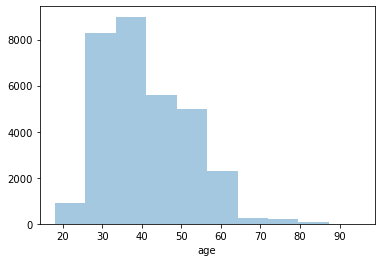

In [10]:
sns.distplot(train['age'],kde=False,bins=10)

In [11]:
##### it can be assumed that age<45 is pretty much interested about the subscription to the bank term deposits

<AxesSubplot:xlabel='marital', ylabel='count'>

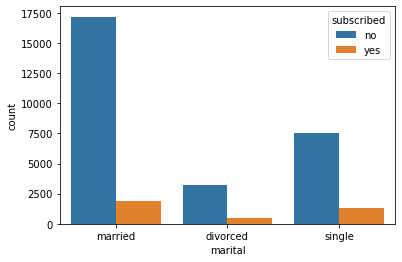

In [12]:
# Visulazing the Categorical Variable "marital" vs "target variable"
sns.countplot(data=train,x="marital",hue="subscribed")

<AxesSubplot:>

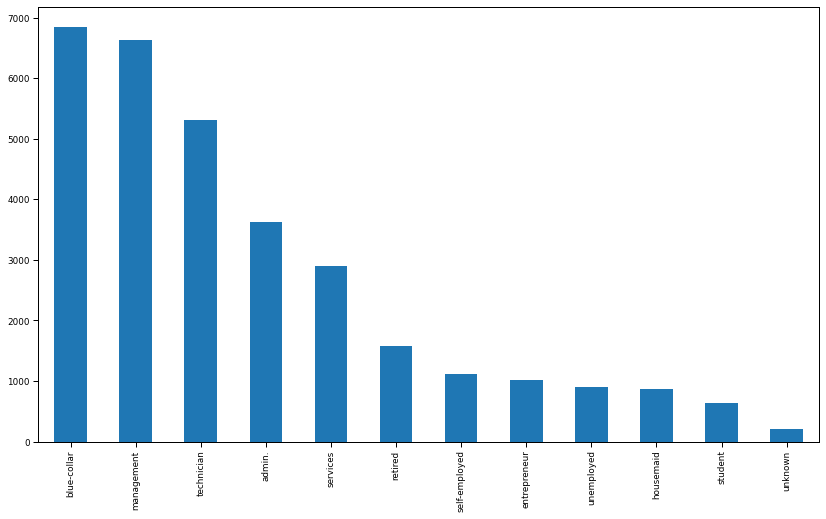

In [13]:
#Visualizing the Variable
sns.set_context('paper')
train['job'].value_counts().plot(kind="bar",figsize=(14,8))

# Bivariate Analysis

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [15]:
job=pd.crosstab(train["job"],train["subscribed"])
job_norm=job.div(job.sum(1).astype(float),axis=0)


<AxesSubplot:xlabel='job'>

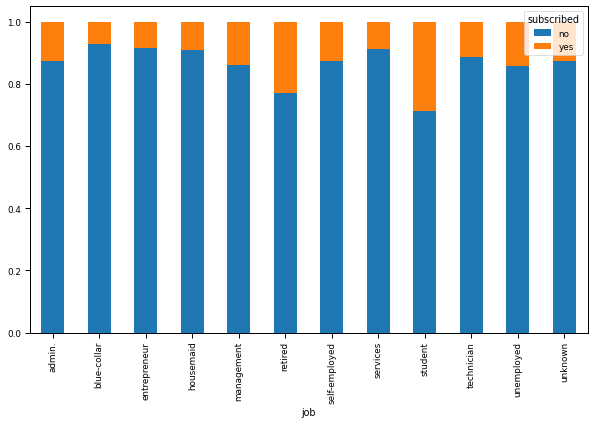

In [16]:
job_norm.plot.bar(stacked=True,figsize=(10,6))

Students are much interested about the Subscription to Term depoists

In [17]:
#Finding the correlation matrix 
corr=train.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<AxesSubplot:>

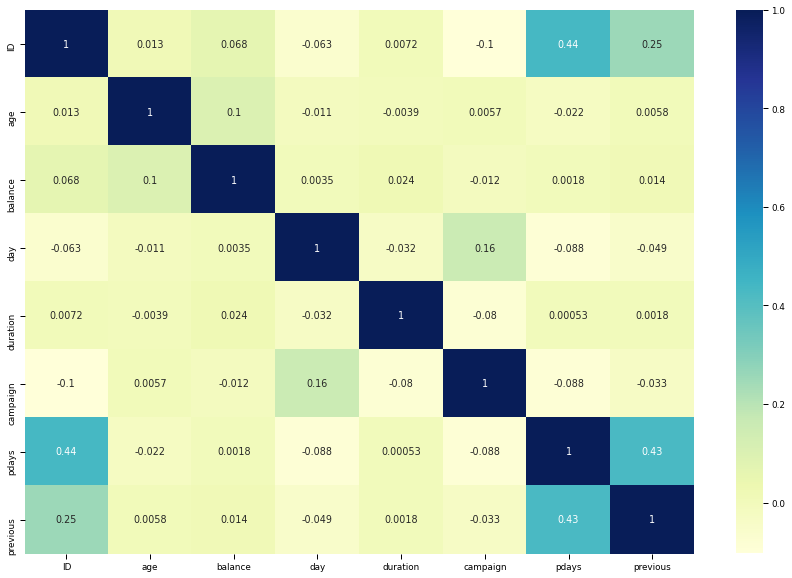

In [18]:
# Visualizing the Correlation Matrix
fig,ax=plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corr,annot=True,cmap='YlGnBu')

Now since We try to visualize all the categorical and continious variables.On the next step we will go to model building with the help of different Algorithms namely LOGISTIC REGRESSION,DECISION TREE CLASSIFICATION  & K-NEAREST NEIGHBOR Classifer and implement the best model to predict the test dataset.

### Model Building

In [19]:
#Dependent and Independent Variables
target = train['subscribed'] #Dependent variable
train = train.drop('subscribed', axis=1) #indeoendent variables

In [20]:
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
#Train test split of the Trainong Dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

Now We have divide the whole dataset into Training and Testig Dataset.Our Dataset is ready to implement all the models.Let's implement our first classification model LOGISITIC REGRESSION.

### Logistic Regression¶

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lreg = LogisticRegression()

In [24]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [25]:
pred = lreg.predict(X_val)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_val,pred)

0.8903633491311217

In [28]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
test_pred = lreg.predict(test)
test_pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

Now Let's implement our next model namely DECISION TREE ALGORITHM

### Decision Tree Algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [33]:
predict = clf.predict(X_val)
predict

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [34]:
accuracy_score(y_val,predict)

0.9042654028436019

In [35]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [36]:
test_pred = clf.predict(test)
test_pred

array(['no', 'yes', 'no', ..., 'no', 'yes', 'no'], dtype=object)

Let's go to next and final model namely K_NEAREST NEIGHBOR CLASSIFIER.

### K-NearestNeighbor Classifier

We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with the K-value=1

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(1)
knn.fit(X_train,y_train)
pred=knn.predict(X_val)

In [38]:
# Predictions and Evaluations 
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_val,pred))
print(classification_report(y_val,pred))

[[5217  391]
 [ 377  345]]
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      5608
         yes       0.47      0.48      0.47       722

    accuracy                           0.88      6330
   macro avg       0.70      0.70      0.70      6330
weighted avg       0.88      0.88      0.88      6330



The accuarcy is higher but leads to overfitting.So,We can't use K=1 for the predictions.

####  Choosing K-Value
We will use different K_values to pick a good value using elbow method

In [39]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_val)
    error_rate.append(np.mean(pred_i!=y_val))

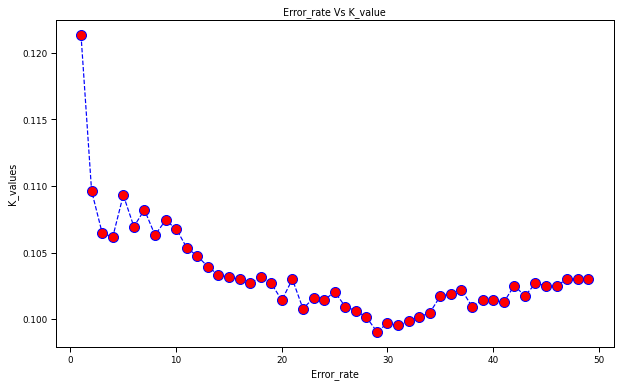

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error_rate Vs K_value")
plt.xlabel("Error_rate")
plt.ylabel("K_values")
plt.show()

Here we cab see that after arouns K>22 the error rate just tends to hover around .101-.102.
We will not use K=29 because it may lead to Overfitting.So,We will go with K=22 and check the Classification report

In [41]:
# WITH K=22:
knn = KNeighborsClassifier(22)
knn.fit(X_train, y_train)
k_pred = knn.predict(X_val)
k_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [42]:
#Evaluation Metrics
accuracy_score(y_val,predict)

0.9042654028436019

It is found that the Prediction of "Y_val" of  Training Dataset is almost 90% accurate.So, We will go with this model top predict our Test Dataset

In [43]:
#Using Dummiies function for the test dataset
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


We will Predict for the test dataset with the help of the given Model

In [44]:
test_pred = knn.predict(test)
test_pred

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [45]:
#Creating a Dataframe for further use of the Prediction array
submissions = pd.DataFrame()

In [46]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [47]:
submissions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562     no
13563     no
Name: subscribed, Length: 13564, dtype: object

#### Now We found the DataFrame consisting of all the Prediction Values. So,We will convert that into a CSV file for further Use .

In [48]:
submissions.to_csv('submission file.csv', header=True, index=False)

In [49]:
################################

Thank You!!!!!!!